## Preprocessing using the [TON_IoT](https://research.unsw.edu.au/projects/toniot-datasets) dataset.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
import seaborn as sb
import warnings
warnings.simplefilter('ignore')

In [3]:
# Read the dataset
dataset = pd.read_csv('./datasets/IoT_Weather.csv')
dataset.head()

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,0,normal


In [4]:
dataset.describe()

,temperature,pressure,humidity,label
count,650242.000000,650242.000000,650242.000000,650242.000000
mean,36.068693,2.014001,51.639290,0.139216
std,8.179922,7.945270,27.035446,0.346172
min,20.507282,-37.632097,0.000162,0.000000
25%,29.116196,0.040772,28.664575,0.000000
50%,36.780820,1.288340,52.649651,0.000000
75%,43.062492,4.134239,74.651183,0.000000
max,50.000000,26.685611,99.889498,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650242 entries, 0 to 650241
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         650242 non-null  object 
 1   time         650242 non-null  object 
 2   temperature  650242 non-null  float64
 3   pressure     650242 non-null  float64
 4   humidity     650242 non-null  float64
 5   label        650242 non-null  int64  
 6   type         650242 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 34.7+ MB


In [6]:
# Remove the time and date, and rename the type 
dataset = dataset.drop('date', axis=1)
dataset = dataset.drop('time', axis=1)
dataset = dataset.rename(columns={'type': 'target'})
dataset.head()

,temperature,pressure,humidity,label,target
0,31.788508,1.035,32.036579,0,normal
1,41.630997,1.035,30.886165,0,normal
2,42.256959,1.035,19.755908,0,normal
3,49.116581,1.035,78.949621,0,normal
4,24.017085,1.035,40.001059,0,normal


In [7]:
# Normalize the dataset
normalize = ['temperature', 'pressure', 'humidity']
scaler = MinMaxScaler()
dataset[normalize] = scaler.fit_transform(dataset[normalize])
dataset.head()

,temperature,pressure,humidity,label,target
0,0.382509,0.601189,0.320719,0,normal
1,0.716235,0.601189,0.309202,0,normal
2,0.737459,0.601189,0.197776,0,normal
3,0.970046,0.601189,0.790369,0,normal
4,0.119006,0.601189,0.400452,0,normal


In [8]:
dataset.describe()

,temperature,pressure,humidity,label
count,650242.000000,650242.000000,650242.000000,650242.000000
mean,0.527636,0.616410,0.516963,0.139216
std,0.277354,0.123532,0.270654,0.346172
min,0.000000,0.000000,0.000000,0.000000
25%,0.291900,0.585731,0.286962,0.000000
50%,0.551782,0.605128,0.527078,0.000000
75%,0.764772,0.649375,0.747337,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [9]:
dataset['label'].value_counts()

label
0    559718
1     90524
Name: count, dtype: int64

<Axes: xlabel='label'>

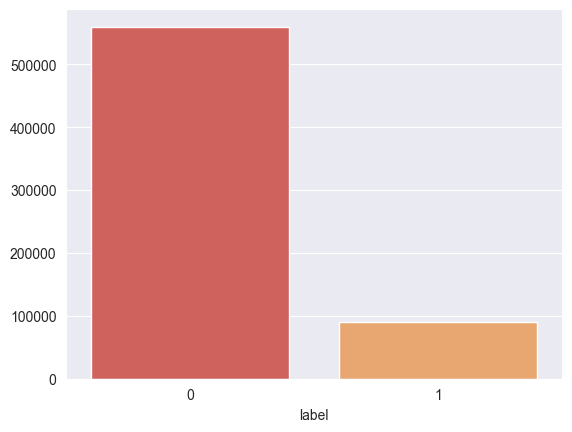

In [10]:
palette = sb.color_palette('Spectral')
sb.barplot(y=dataset['label'].value_counts().values, x=dataset['label'].value_counts().index, palette=palette)

In [11]:
# Export the dataset
dataset_label = dataset[['temperature', 'pressure', 'humidity', 'label']]
dataset_label.to_csv("./datasets/label_data.csv", index=False, header=True)

In [12]:
dataset['target'].value_counts()

target
normal        559718
backdoor       35641
password       25715
ddos           15182
injection       9726
ransomware      2865
xss              866
scanning         529
Name: count, dtype: int64

<Axes: xlabel='target'>

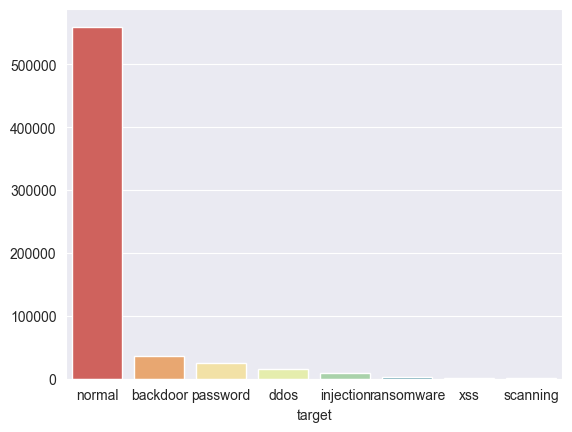

In [13]:
sb.barplot(y=dataset['target'].value_counts().values, x=dataset['target'].value_counts().index, palette=palette)

<Axes: title={'center': 'Targets Distribution'}>

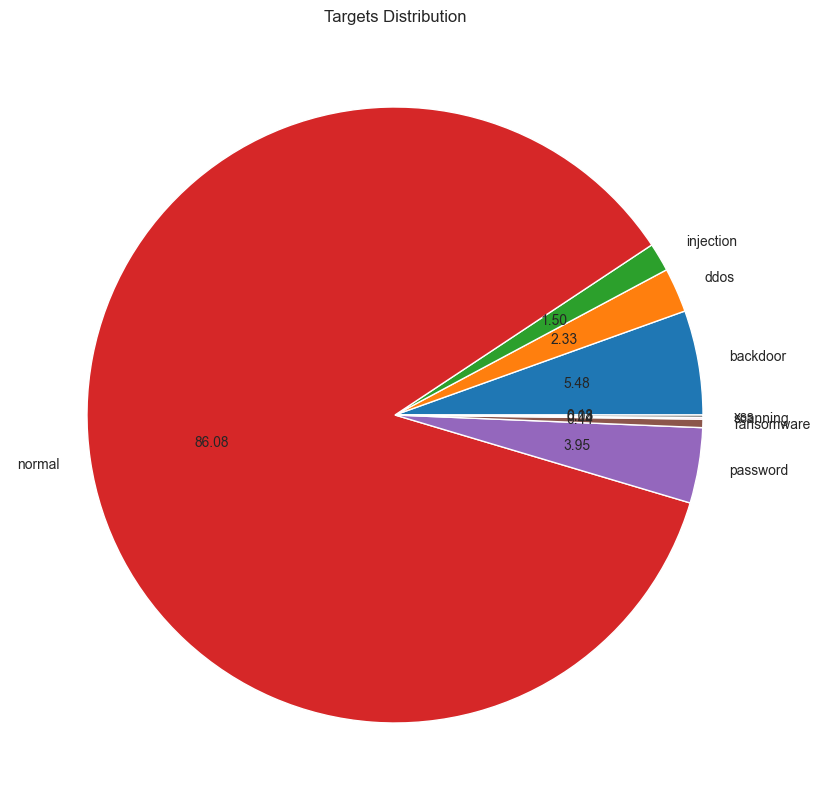

In [14]:
# Show the targets distribution
plt.title("Targets Distribution")
dataset.groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))

In [15]:
# Mapping the type to the integer
mapping = {'normal': 0, 'backdoor': 1, 'password': 2, 'ddos': 3, 'injection': 4, 'ransomware': 5, 'xss': 6, 'scanning': 7}
dataset['target'] = dataset['target'].replace(mapping)
dataset.head()

,temperature,pressure,humidity,label,target
0,0.382509,0.601189,0.320719,0,0
1,0.716235,0.601189,0.309202,0,0
2,0.737459,0.601189,0.197776,0,0
3,0.970046,0.601189,0.790369,0,0
4,0.119006,0.601189,0.400452,0,0


In [16]:
dataset['target'].value_counts()

target
0    559718
1     35641
2     25715
3     15182
4      9726
5      2865
6       866
7       529
Name: count, dtype: int64

In [17]:
# Export the dataset
dataset_target = dataset[['temperature', 'pressure', 'humidity', 'target']]
dataset_target.to_csv("./datasets/target_data.csv", index=False, header=True)

## Generate balanced datasets using RandomUnderSampler, SMOTE, RandomOverSampler, respectively.

In [18]:
# Balance the dataset using RandomUnderSampler
ru = RandomUnderSampler(random_state=0)
X1, y1 = ru.fit_resample(dataset_label.iloc[:, :-1], dataset_label.iloc[:, -1])
ru_dataset = pd.DataFrame(X1)
ru_dataset['target'] = y1
print("Size of the RandomUnderSampler dataset:", len(ru_dataset))
ru_dataset.to_csv("./datasets/ru_data.csv", index=False, header=True)
ru_dataset['target'].value_counts()

Size of the RandomUnderSampler dataset: 181048


target
0    90524
1    90524
Name: count, dtype: int64

<Axes: xlabel='target'>

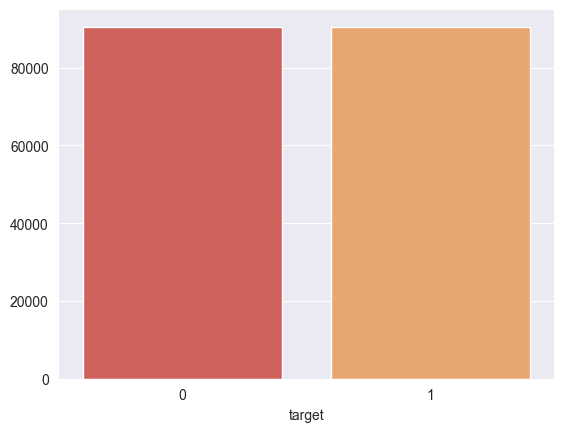

In [19]:
sb.barplot(y=ru_dataset['target'].value_counts().values, x=ru_dataset['target'].value_counts().index, palette=palette)

In [20]:
# Balance the dataset using RandomOverSampler
ro = RandomOverSampler(random_state=0)
X2, y2 = ro.fit_resample(dataset_label.iloc[:, :-1], dataset_label.iloc[:, -1])
ro_dataset = pd.DataFrame(X2)
ro_dataset['target'] = y2
print("Size of the RandomOverSampler dataset:", len(ro_dataset))
ro_dataset.to_csv("./datasets/ro_data.csv", index=False, header=True)
ro_dataset['target'].value_counts()

Size of the RandomOverSampler dataset: 1119436


target
0    559718
1    559718
Name: count, dtype: int64

<Axes: xlabel='target'>

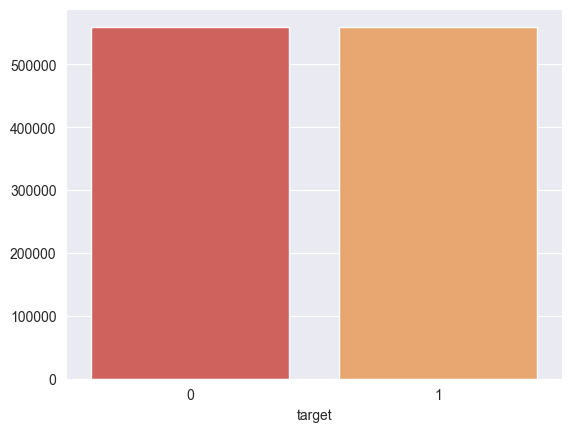

In [21]:
sb.barplot(y=ro_dataset['target'].value_counts().values, x=ro_dataset['target'].value_counts().index, palette=palette)

In [22]:
# Balance the dataset using SMOTE
sm = SMOTE(random_state=42)
X3, y3 = sm.fit_resample(dataset_label.iloc[:, :-1], dataset_label.iloc[:, -1])
sm_dataset = pd.DataFrame(X3)
sm_dataset['target'] = y3
print("Size of the SMOTE dataset:", len(sm_dataset))
sm_dataset.to_csv("./datasets/sm_data.csv", index=False, header=True)
sm_dataset['target'].value_counts()

Size of the SMOTE dataset: 1119436


target
0    559718
1    559718
Name: count, dtype: int64

<Axes: xlabel='target'>

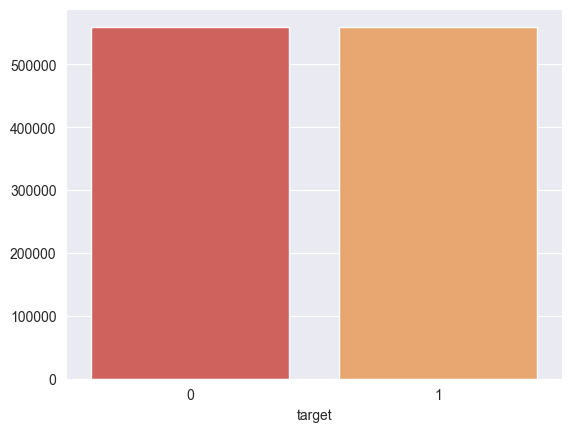

In [23]:
sb.barplot(y=sm_dataset['target'].value_counts().values, x=sm_dataset['target'].value_counts().index, palette=palette)

<Axes: >

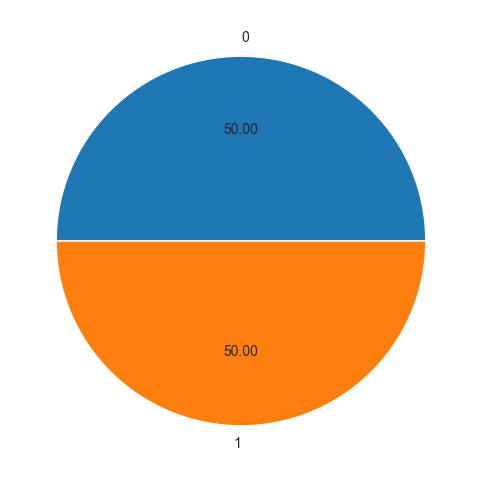

In [24]:
sm_dataset.groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(6,6))